In [1]:
def findexact(str, substr, index=0):
  offset = str.find(substr)
  ln = len(substr)
  if not index:
    return offset
  return offset + ln + findexact(str[offset+ln :], substr, index-1)

def multifind(str, substrs):
  ret = len(str)
  for substr in substrs:
    index = findexact(str, substr)
    if index > -1 and index < ret:
      ret = index
  if ret == len(str):
    ret = -1
  return ret

In [2]:
!pip install gdown --quiet
!pip install docx2txt --quiet

import gdown
import docx2txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix

  Preparing metadata (setup.py) ... done


In [3]:
!gdown 12PfGMG4aAXA-dTJ3QmhN0crpqf_4WyZb

txt = docx2txt.process("CCXXXI.docx")

Downloading...
From: https://drive.google.com/uc?id=12PfGMG4aAXA-dTJ3QmhN0crpqf_4WyZb
To: /content/CCXXXI.docx
100% 380k/380k [00:00<00:00, 90.3MB/s]


In [4]:
months = ["vendémiaire", "brumaire", "frimaire", "nivôse", "pluviôse", "ventôse",
          "germinal", "floréal", "prairial", "messidor", "thermidor", "fructidor"]
for month in months:
  txt = txt.replace(month.upper(), "")

labels = ["monologue", "story", "fanfic", "chguestk", "cliff", "letter", "lyrics"]

df = pd.DataFrame(columns=["name", "day", "month", "greg_day", "greg_month", "label", "text"])

while(multifind(txt, labels) != -1):
  start = multifind(txt, labels)
  label = txt[start : txt.find(" ", start)]
  txt = txt[start + len(label) :]
  day = pd.Series({
      "name" : txt[findexact(txt, " ", 3) + 1 : findexact(txt, "\n")],
      "day" : int(txt[findexact(txt, " ", 1) + 1 : findexact(txt, " ", 2)]),
      "month" : txt[findexact(txt, " ", 2) + 1 : findexact(txt, ".", 1)],
      "greg_day" : int(txt[findexact(txt, "(") + 1 : findexact(txt, ".")]),
      "greg_month" : int(txt[findexact(txt, ".") + 1 : findexact(txt, ")")]),
      "label" : label,
      "text" : txt[findexact(txt, "\n", 1) + 1 : multifind(txt, labels)],
  })
  df = pd.concat([df, day.to_frame().T], ignore_index=True)

In [5]:
df["text"] = df["text"].map(lambda x: " ".join(x.split()))
df["sentences"] = df["text"].map(lambda x: len(x.replace("?", ".").replace("!", ".").split(". ")))
df["words"] = df["text"].map(lambda x: len(x.replace("-", "").split()))
df["symbols"] = df["text"].map(lambda x: len(x.replace(" ", "")))
df["capitals"] = df["text"].map(lambda x: len(list(filter(lambda c: c.isupper(), x))))
df["dashes"] = df["text"].map(lambda x: len(list(filter(lambda w: w == "-", x.split()))))
df["questions"] = df["text"].map(lambda x: len(list(filter(lambda c: c == "?", x))))
df["exclamations"] = df["text"].map(lambda x: len(list(filter(lambda c: c == "!", x))))

In [6]:
df

,name,day,month,greg_day,greg_month,label,text,sentences,words,symbols,capitals,dashes,questions,exclamations
0,raisin,1,vendémiaire,23,9,monologue,люди не изменились. ароматная жидкость мягко к...,17,238,1339,0,4,2,0
1,safran,2,vendémiaire,24,9,story,Сафран горд своим прозвищем. нет большого смыс...,21,333,1940,5,3,1,1
2,châtaigne,3,vendémiaire,25,9,story,Кристине исполняется четыре года. белокурая ма...,30,514,2824,10,13,5,2
3,colchique,4,vendémiaire,26,9,story,с тихим звонком открываются двери лифта. мягки...,37,339,1907,30,12,6,2
4,cheval,5,vendémiaire,27,9,story,Келлер Долль привычным движением запрыгивает в...,22,374,2252,10,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,silex,16,nivôse,6,1,fanfic,"ты будто стоишь на краю обрыва, с трепетом заг...",17,303,1558,1,7,0,0
106,marne,17,nivôse,7,1,story,"поезд как будто бы немного замедляется, но вед...",17,366,2102,2,5,1,0
107,pierre à chaux,18,nivôse,8,1,story,у нас всё по плану. ежедневные списки дел стаб...,19,334,1947,0,6,0,0
108,marbre,19,nivôse,9,1,chguestk,"зачем так стремиться в будущее, взволнованно в...",20,353,2088,1,5,3,0


In [7]:
df[df["label"] == "fanfic"].sort_values(by=["exclamations", "questions"], ascending=False)

,name,day,month,greg_day,greg_month,label,text,sentences,words,symbols,capitals,dashes,questions,exclamations
28,orge,29,vendémiaire,21,10,fanfic,она разносит напитки в баре. и от привычке к э...,18,319,1757,4,15,0,1
103,grès,14,nivôse,4,1,fanfic,"забудьте всё, что помнили о ней, как забываю э...",22,314,1657,3,6,2,0
63,nèfle,4,frimaire,25,11,fanfic,"вместо холода, твёрдости, разложения, которых ...",16,272,1532,3,6,1,0
80,érable sucré,21,frimaire,12,12,fanfic,густая жидкость янтарного оттенка медленно рас...,18,325,1890,4,7,1,0
18,tournesol,19,vendémiaire,11,10,fanfic,"сам он, по сути, никогда не стремился к соверш...",24,474,2460,6,11,0,0
60,raiponce,1,frimaire,22,11,fanfic,"жизнь была сказкой. ярко-разноцветной, как кар...",13,279,1638,2,5,0,0
91,houille,2,nivôse,23,12,fanfic,"бред пеленой застилает глаза, превращает прохо...",18,321,1769,2,9,0,0
105,silex,16,nivôse,6,1,fanfic,"ты будто стоишь на краю обрыва, с трепетом заг...",17,303,1558,1,7,0,0


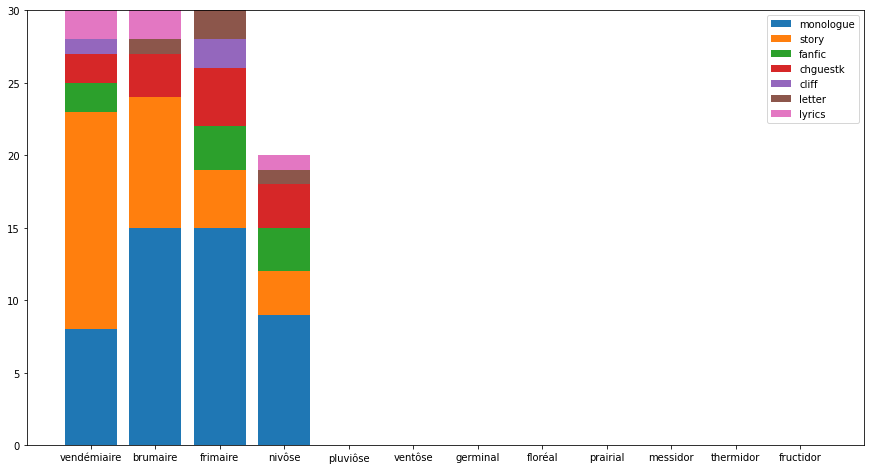

In [16]:
fig = plt.figure(figsize=(15, 8))
bottom = np.zeros(len(months))
for label in labels:
  count = np.empty(0)
  for month in months:
    count = np.append(count, df[(df["month"] == month) & (df["label"] == label)].shape[0])
  plt.bar(np.asarray(months), count, label=label, bottom=bottom)
  bottom += count
plt.legend()
plt.show()

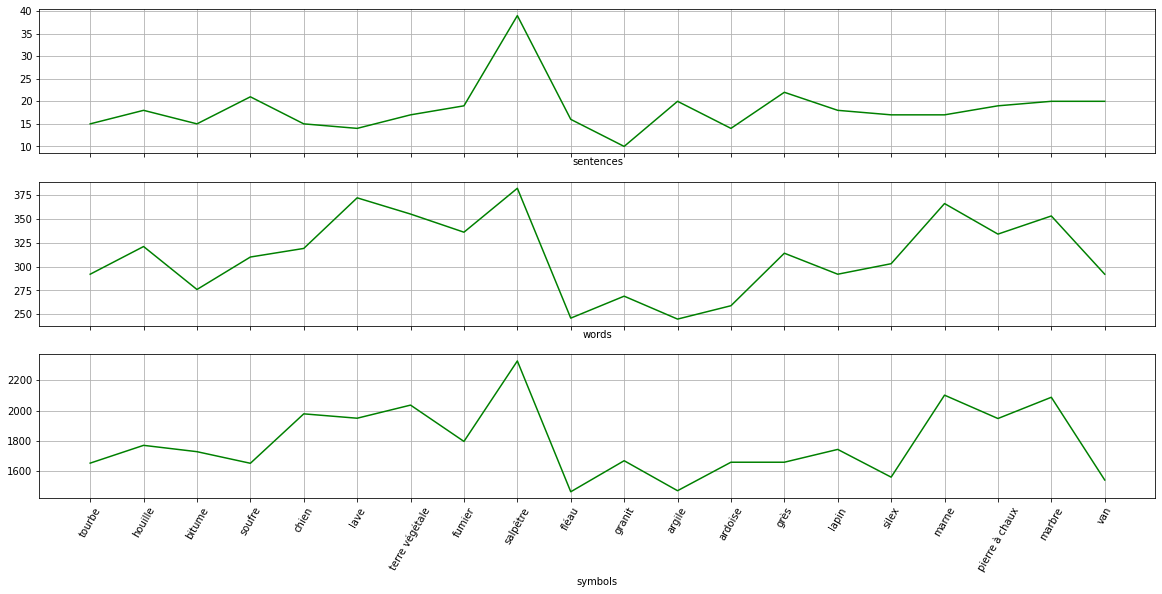

In [24]:
batch = df[df["month"] == months[3]]

plots = ["sentences", "words", "symbols"]
# plots = ["capitals", "dashes", "questions", "exclamations"]
fig, axs = plt.subplots(len(plots), 1, sharex=True, figsize=(batch.shape[0], 3 * len(plots)))
for i in range(len(plots)):
  axs[i].plot(batch["name"], batch[plots[i]], 'g')
  axs[i].set_xlabel(plots[i])
  axs[i].grid()
plt.xticks(rotation=60)
plt.show()

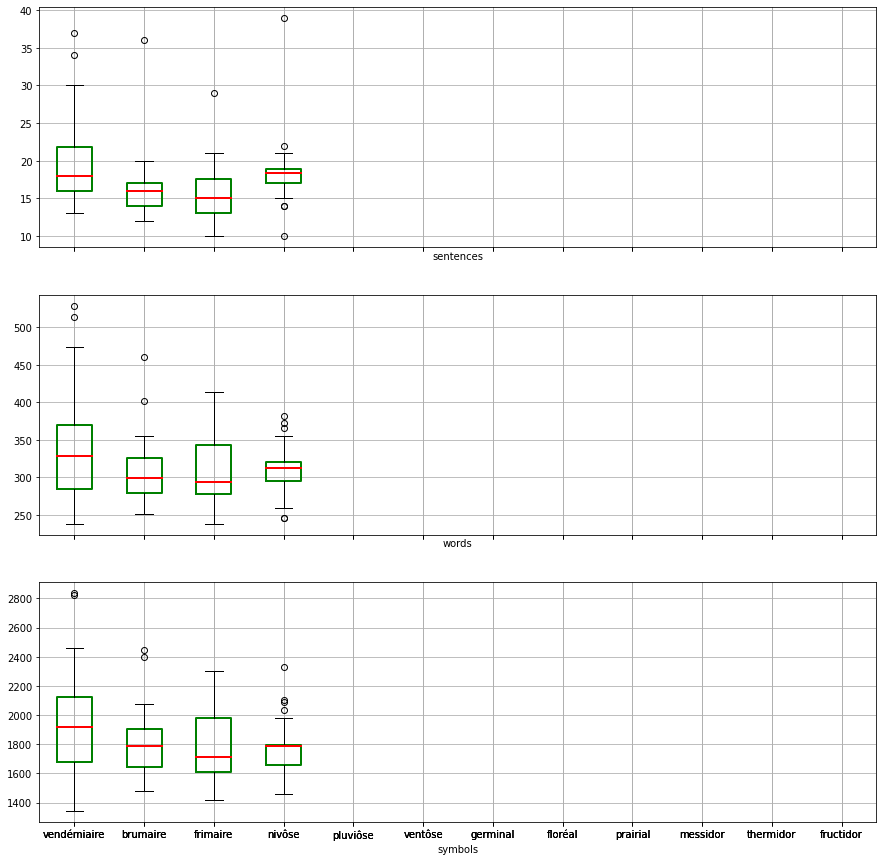

In [25]:
boxprops = dict(linewidth=2, color='g')
medianprops = dict(linewidth=2, color='r')

plots = ["sentences", "words", "symbols"]
fig, axs = plt.subplots(len(plots), 1, sharex=True, figsize=(15, 5 * len(plots)))
for i in range(len(plots)):
  stat = pd.DataFrame(columns=months)
  for month in months:
    stat[month] = df[df["month"] == month][plots[i]].reset_index(drop=True)
    stat[month].fillna(stat[month].mean(), inplace=True)
  axs[i].boxplot(stat.to_numpy(), labels=stat.columns, widths=0.5, boxprops=boxprops, medianprops=medianprops)
  axs[i].set_xlabel(plots[i])
  axs[i].grid()
plt.suptitle("")
plt.show()

linreg MSE:  10.303030303030303
ridge MSE:  4.3099430276360815


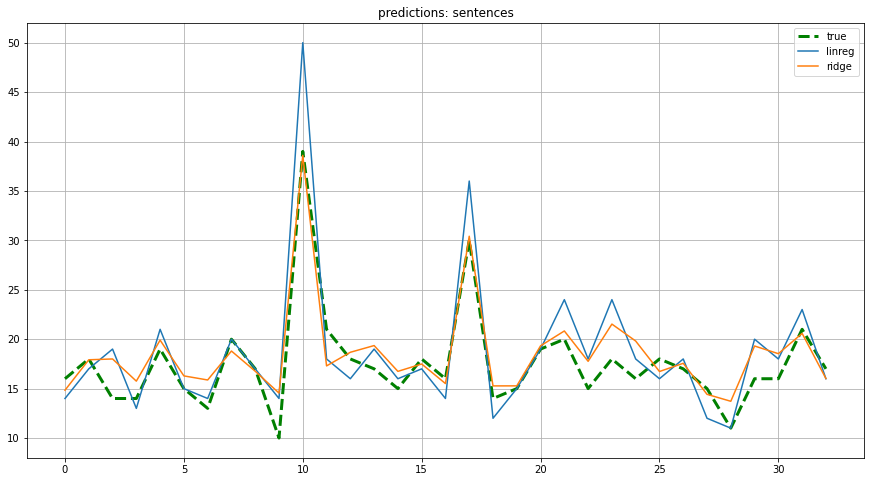

In [17]:
target_column = "sentences"
dum_df = pd.get_dummies(data=df, columns=["month", "label"]).drop(columns=["name", "text"])
X, y = dum_df.drop(columns=[target_column]), dum_df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

params = np.arange(0, 150, 1)
loss = []
for p in params:
  model = Ridge(alpha=p, random_state=88).fit(X_train, y_train)
  y_pred = model.predict(X_test)
  loss.append(mean_squared_error(y_test, y_pred))
alpha = params[np.argmin(loss)]

reg = LinearRegression().fit(X_train, y_train)
y_pred_reg = reg.predict(X_test).astype(int)
ridge = Ridge(alpha=alpha, random_state=88).fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("linreg MSE: ", mean_squared_error(y_test, y_pred_reg))
print("ridge MSE: ", mean_squared_error(y_test, y_pred_ridge))

fig = plt.figure(figsize=(15, 8))
plt.plot(range(len(y_test)), y_test, label="true", color='g', linewidth=3, linestyle="dashed")
plt.plot(range(len(y_pred_reg)), y_pred_reg, label="linreg")
plt.plot(range(len(y_pred_ridge)), y_pred_ridge, label="ridge")
plt.title("predictions: " + target_column)
plt.grid()
plt.legend()
plt.show()

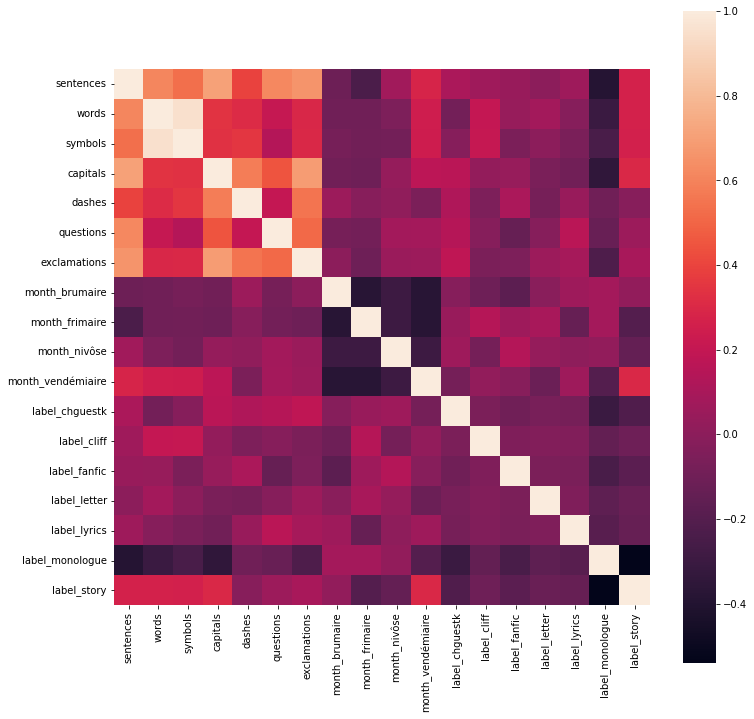

In [32]:
fig = plt.figure(figsize=(12, 12))
sns.heatmap(dum_df.corr(), square=True)

In [11]:
ops = list(map(lambda x: x[:findexact(x, " ", 0)], df["text"]))
ops.sort(key=lambda x: x.lower())

In [12]:
# todo: something that has to do with text processing ?

accuracy:  0.5757575757575758


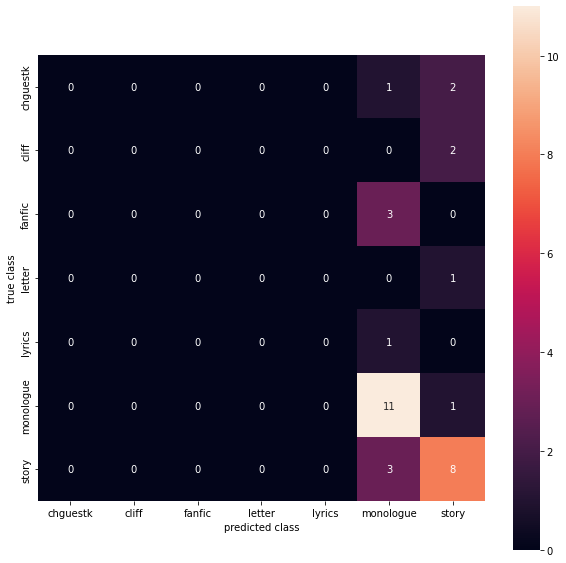

In [36]:
target_column = "label"
clf_dum_df = pd.get_dummies(data=df, columns=["month"]).drop(columns=["name", "text"])
X, y = clf_dum_df.drop(columns=[target_column]), clf_dum_df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

clf = RandomForestClassifier(random_state=88).fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)

print("accuracy: ", classification_report(y_test, y_pred_clf, labels=clf.classes_, zero_division=0, output_dict=True)["accuracy"])

fig = plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, y_pred_clf, labels=clf.classes_),
            xticklabels=clf.classes_, yticklabels=clf.classes_, annot=True, square=True)
plt.xlabel("predicted class")
plt.ylabel("true class")
plt.show()